# **This tutorial is divided into three parts; they are:**

1. BatchNormalization in Keras


2. BatchNormalization in Models


3. BatchNormalization Case Study

# BatchNormalization in Keras


Keras provides support for batch normalization via the BatchNormalization layer.

For example:

bn = BatchNormalization()

1. The layer will transform inputs so that they are standardized, meaning that they will have a mean of zero and a standard deviation of one.

2. During training, the layer will keep track of statistics for each input variable and use them to standardize the data.

3. Further, the standardized output can be scaled using the learned parameters of Beta and Gamma that define the new mean and standard deviation for the output of the transform. The layer can be configured to control whether these additional parameters will be used or not via the “center” and “scale” attributes respectively. By default, they are enabled.

4. The statistics used to perform the standardization, e.g. the mean and standard deviation of each variable, are updated for each mini batch and a running average is maintained.

5. A “momentum” argument allows you to control how much of the statistics from the previous mini batch to include when the update is calculated. By default, this is kept high with a value of 0.99. This can be set to 0.0 to only use statistics from the current mini-batch, as described in the original paper.

bn = BatchNormalization(momentum=0.0)

# **BatchNormalization in Models**

Batch normalization can be used at most points in a model and with most types of deep learning neural networks.

# **Input and Hidden Layer Inputs**

The BatchNormalization layer can be added to your model to standardize raw input variables or the outputs of a hidden layer.

Batch normalization is not recommended as an alternative to proper data preparation for your model.

Nevertheless, when used to standardize the raw input variables, the layer must specify the input_shape argument; for example:

...

model = Sequential()

model.add(BatchNormalization(input_shape=(2,)))

...

When used to standardize the outputs of a hidden layer, the layer can be added to the model just like any other layer.

...

model = Sequential()

...

model.add(BatchNormalization())
...

# Use Before or After the Activation Function

1. The BatchNormalization normalization layer can be used to standardize inputs before or after the activation function of the previous layer.

2. The original paper that introduced the method suggests adding batch normalization before the activation function of the previous layer, for example:

...

model = Sequential()

model.add(Dense(32))

model.add(BatchNormalization())

model.add(Activation('relu'))

...

Some reported experiments suggest better performance when adding the batch normalization layer after the activation function of the previous layer; for example

...

model = Sequential()

model.add(Dense(32, activation='relu'))

model.add(BatchNormalization())
...


# MLP Batch Normalization

The example below adds batch normalization after the activation function between Dense hidden layers.

# example of batch normalization for an mlp
from keras.layers import Dense

from keras.layers import BatchNormalization
...

model.add(Dense(32, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(1))
...

# CNN Batch Normalization

The example below adds batch normalization after the activation function between a convolutional and max pooling layers.

# example of batch normalization for an cnn

from keras.layers import Dense

from keras.layers import Conv2D

from keras.layers import MaxPooling2D

from keras.layers import BatchNormalization

...


model.add(Conv2D(32, (3,3), activation='relu'))

model.add(Conv2D(32, (3,3), activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Dense(1))


...

# **RNN Batch Normalization**

The example below adds batch normalization after the activation function between an LSTM and Dense hidden layers.

# example of batch normalization for a lstm
from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import BatchNormalization

...

model.add(LSTM(32))

model.add(BatchNormalization())

model.add(Dense(1))

...

# BatchNormalization Case Study

# Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class.

Each observation has two input variables with the same scale and a class output value of either 0 or 1. This dataset is called the “circles” dataset because of the shape of the observations in each class when plotted.

We can use the make_circles() function to generate observations from this problem. We will add noise to the data and seed the random number generator so that the same samples are generated each time the code is run.

In [30]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
# example of batch normalization for an mlp
from keras.layers import Dense
from keras.layers import BatchNormalization,Activation
from matplotlib import pyplot


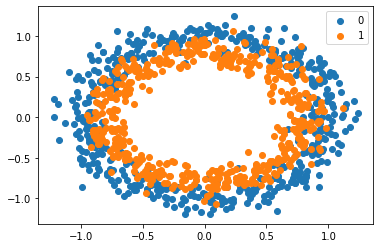

In [3]:
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class.

We can see the noise in the dispersal of the points making the circles less obvious.

This is a good test problem because the classes cannot be separated by a line, e.g. are not linearly separable, requiring a nonlinear method such as a neural network to address.

# Multilayer Perceptron Model

We can develop a Multilayer Perceptron model, or MLP, as a baseline for this problem.

First, we will split the 1,000 generated samples into a train and test dataset, with 500 examples in each. This will provide a sufficiently large sample for the model to learn from and an equally sized (fair) evaluation of its performance.

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

We will define a simple MLP model. The network must have two inputs in the visible layer for the two variables in the dataset.

The model will have a single hidden layer with 50 nodes, chosen arbitrarily, and use the rectified linear activation function (ReLU) and the He random weight initialization method. The output layer will be a single node with the sigmoid activation function, capable of predicting a 0 for the outer circle and a 1 for the inner circle of the problem.

The model will be trained using stochastic gradient descent with a modest learning rate of 0.01 and a large momentum of 0.9, and the optimization will be directed using the binary cross entropy loss function.

In [12]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3988 - accuracy: 0.8260 - val_loss: 0.3793 - val_accuracy: 0.8380
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8200 - val_loss: 0.3812 - val_accuracy: 0.8420
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4001 - accuracy: 0.8320 - val_loss: 0.3777 - val_accuracy: 0.8440
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3938 - accuracy: 0.8260 - val_loss: 0.3766 - val_accuracy: 0.8520
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.8260 - val_loss: 0.3788 - val_accuracy: 0.8440
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8220 - val_loss: 0.3774 - val_accuracy: 0.8440
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8220 - val_loss: 0.3771 - val_accuracy: 0.8540
Epoch 8/100
1

At the end of the run, the model is evaluated on the train and test dataset and the accuracy is reported.

In [15]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.832, Test: 0.846


Finally, line plots are created showing model accuracy on the train and test sets at the end of each training epoch providing learning curves.

This plot of learning curves is useful as it gives an idea of how quickly and how well the model has learned the problem.

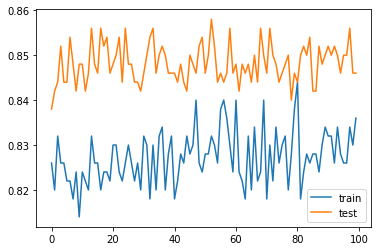

In [16]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# MLP With Batch Normalization

The model introduced in the previous section can be updated to add batch normalization.

The expectation is that the addition of batch normalization would accelerate the training process, offering similar or better classification accuracy of the model in fewer training epochs. Batch normalization is also reported as providing a modest form of regularization, meaning that it may also offer a small reduction in generalization error demonstrated by a small increase in classification accuracy on the holdout test dataset.

A new BatchNormalization layer can be added to the model after the hidden layer before the output layer. Specifically, after the activation function of the prior hidden layer.

In [17]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 7ms/step - loss: 0.4398 - accuracy: 0.8060 - val_loss: 0.3606 - val_accuracy: 0.8440
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.7980 - val_loss: 0.3580 - val_accuracy: 0.8640
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4070 - accuracy: 0.8040 - val_loss: 0.3685 - val_accuracy: 0.8480
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.8200 - val_loss: 0.3591 - val_accuracy: 0.8480
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8260 - val_loss: 0.3679 - val_accuracy: 0.8380
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.7760 - val_loss: 0.3624 - val_accuracy: 0.8540
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.7940 - val_loss: 0.3645 - val_accuracy: 0.8420
Epoch 8/100
1

In [20]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.844, Test: 0.844


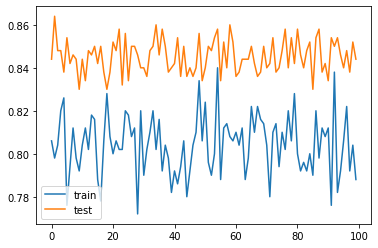

In [21]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


Running the example first prints the classification accuracy of the model on the train and test dataset.

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see comparable performance of the model on both the train and test set of about 84% accuracy, very similar to what we saw in the previous section, if not a little bit better.

A graph of the learning curves is also created showing classification accuracy on both the train and test sets for each training epoch.

In this case, we can see that the model has learned the problem faster than the model in the previous section without batch normalization. Specifically, we can see that classification accuracy on the train and test datasets leaps above 80% within the first 20 epochs, as opposed to 30-to-40 epochs in the model without batch normalization.

The plot also shows the effect of batch normalization during training. We can see lower performance on the training dataset than the test dataset: scores on the training dataset that are lower than the performance of the model at the end of the training run. This is likely the effect of the input collected and updated each mini-batch.

# **Batch normalization is applied prior to the activation function of the hidden layer**

We can also try a variation of the model where batch normalization is applied prior to the activation function of the hidden layer, instead of after the activation function.

In [31]:
# define model

model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [32]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 27ms/step - loss: 0.7586 - accuracy: 0.5080 - val_loss: 0.7125 - val_accuracy: 0.4960
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6874 - accuracy: 0.5300 - val_loss: 0.7030 - val_accuracy: 0.5080
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6809 - accuracy: 0.5300 - val_loss: 0.6951 - val_accuracy: 0.5100
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.6755 - accuracy: 0.5440 - val_loss: 0.6844 - val_accuracy: 0.5220
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6751 - accuracy: 0.5440 - val_loss: 0.6783 - val_accuracy: 0.5240
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6666 - accuracy: 0.5920 - val_loss: 0.6755 - val_accuracy: 0.5780
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6678 - accuracy: 0.5660 - val_loss: 0.6674 - val_accuracy: 0.5720
Epoch 8/

In [33]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=1)
_, test_acc = model.evaluate(testX, testy, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

16/16 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.8480
Train: 0.830, Test: 0.848


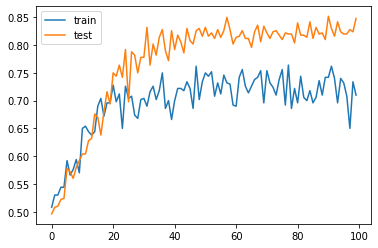

In [34]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()